# 数据加载

In [2]:
# 导入包

# 自动重新加载更改后的Python模块
%load_ext autoreload
%autoreload 2

try:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ConvNetFromScratch'
    GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
    print(os.listdir(GOOGLE_DRIVE_PATH))
    import sys
    sys.path.append(GOOGLE_DRIVE_PATH)
except:
    pass

import time, os, torch, torchvision, random, time, math
from torch import Tensor
import torchvision
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 10
from toolset import *
from toolset.utils import *
from toolset.data import *
from toolset.helper import *
from toolset.solver import *
from convolutional_networks import *
from fully_connected_networks import *

if torch.cuda.is_available:
    print('Good to go!')

Good to go!


cuda
训练数据集的形态: torch.Size([60000, 1, 28, 28])


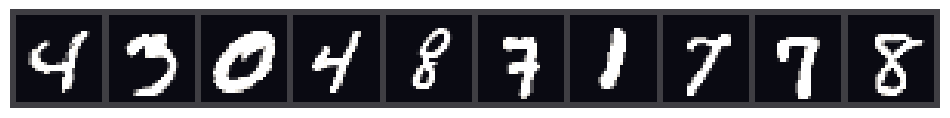

In [3]:
# 数据加载
train_data, train_labels, test_data, test_labels = get_mnist_data()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
train_data = train_data.to(device)
train_labels = train_labels.to(device)
test_data = test_data.to(device)
test_labels = test_labels.to(device)

data_dict = {
    'X_train': train_data,
    'y_train': train_labels,
    'X_val': test_data,
    'y_val': test_labels,
}
print("训练数据集的形态:", train_data.shape)
clear()

tensor_to_imggrid_show(test_data[:10])


# 训练与保存

In [10]:
reset_seed(0)
net = ThreeLayerConvNet(
    input_dims = (1, 28, 28),
    num_filters = 32,
    hidden_dim = 128,
    num_classes = 10,
    weight_scale = 1e-3,
    reg = 1e-5,
    device='cuda'
)
solver = Solver(net, data_dict,
                num_epochs=3, batch_size=50,
                optim_config={
                'learning_rate': 0.001,
                },
                update_rule=adam,
                verbose=True, device='cuda',print_every=100)

In [11]:
reset_seed(0)
solver.train(time_limit=600)
# 你的模型应该能达到95%+准确率

(用时 0.01s; 迭代次数1 / 3600) loss: 2.302593
(Epoch 0 / 3, train 准确率: 11.20%, val准确率: 10.10%
更新:当前准确率10.10, 大于之前的最佳准确率0.00

(用时 0.69s; 迭代次数101 / 3600) loss: 0.500972
(用时 1.14s; 迭代次数201 / 3600) loss: 0.267369
(用时 1.61s; 迭代次数301 / 3600) loss: 0.079804
(用时 2.08s; 迭代次数401 / 3600) loss: 0.101923
(用时 2.55s; 迭代次数501 / 3600) loss: 0.286460
(用时 3.01s; 迭代次数601 / 3600) loss: 0.062335
(用时 3.46s; 迭代次数701 / 3600) loss: 0.086884
(用时 3.92s; 迭代次数801 / 3600) loss: 0.086682
(用时 4.37s; 迭代次数901 / 3600) loss: 0.182105
(用时 4.83s; 迭代次数1001 / 3600) loss: 0.183048
(用时 5.27s; 迭代次数1101 / 3600) loss: 0.061077
(Epoch 1 / 3, train 准确率: 96.90%, val准确率: 97.60%
更新:当前准确率97.60, 大于之前的最佳准确率10.10

(用时 5.78s; 迭代次数1201 / 3600) loss: 0.031119
(用时 6.24s; 迭代次数1301 / 3600) loss: 0.014417
(用时 6.72s; 迭代次数1401 / 3600) loss: 0.169545
(用时 7.22s; 迭代次数1501 / 3600) loss: 0.037534
(用时 7.72s; 迭代次数1601 / 3600) loss: 0.012439
(用时 8.20s; 迭代次数1701 / 3600) loss: 0.031449
(用时 8.70s; 迭代次数1801 / 3600) loss: 0.020910
(用时 9.16s; 迭代次数1901 / 3600) loss: 0.

In [12]:
# 保存权重模型
model_path = 'mnist_model.pth'
net.save(model_path)

Saved in mnist_model.pth


# 加载模型,测试准确率

In [5]:
# 加载检测
from convolutional_networks import ThreeLayerConvNet

model_path = 'mnist_model.pth'
device = 'cuda'
net_mnist = ThreeLayerConvNet(device=device)
net_mnist.load(model_path ,device='cuda')  #

load model in cuda!
load checkpoint file: mnist_model.pth


In [6]:
# 检验验证集准确率
from toolset.solver import Solver
solver_checker = Solver(net_mnist, data_dict,optim_config={
                'learning_rate': 0.001,
                },device=device)
acc = solver_checker.check_accuracy(data_dict['X_val'],data_dict['y_val'])
print(f"acc:{acc*100:.2f}%")

acc:98.76%


# 可视化推理结果

In [7]:
device = 'cpu'
net_mnist = ThreeLayerConvNet(device=device)
net_mnist.load("mnist_model.pth",device=device)

load model in cpu!
load checkpoint file: mnist_model.pth


torch.float32
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15.,  35.,  43.,  40.,  31.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,  44., 105., 144., 160., 160., 155., 138.,  95.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,  65., 131., 168., 166., 125., 105.,  85.,  87., 117., 140.,  36.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  47., 127., 169., 158., 106.,  54.,  10.,   0

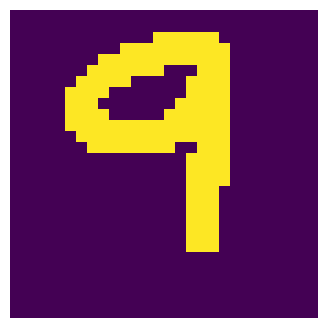

In [9]:
# 画笔测试
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import torch
# 创建Tkinter主窗口
root = tk.Tk()

# 创建一个Canvas，用户可以在上面绘制数字
canvas_size = 280  # canvas的大小
canvas = tk.Canvas(root, width=canvas_size, height=canvas_size, bg='black')
canvas.pack()

# 创建一个PIL Image对象和一个ImageDraw对象，我们会在这个Image对象上进行绘图
img = Image.new('L', (canvas_size, canvas_size), 0)
draw = ImageDraw.Draw(img)

# 定义鼠标拖动事件的处理函数，用于绘图
def draw_digit(event):
    radius = 9  # 设置画笔粗细
    x1, y1 = (event.x - radius), (event.y - radius)
    x2, y2 = (event.x + radius), (event.y + radius)
    canvas.create_oval(x1, y1, x2, y2, fill='white', outline='white')
    draw.ellipse([x1, y1, x2, y2], fill='white', outline='gray')



canvas.bind('<B1-Motion>', draw_digit)

def detect_func(x:Tensor):  
    # (28,28)
    print(x.dtype) 
    torch.set_printoptions(threshold=99999999, linewidth=9999999)
    print(x)
    x.unsqueeze_(0) # (1,28,28)
    
    plt.imshow(tensor_to_image(x))
    plt.axis("off")
    plt.show()
    
    x.unsqueeze_(0) # (1, 1, 28, 28)
    
    # 归一化，参数从mnist的数据集上统计得来
    mean = 0.1307
    std = 0.3081
    x = (x - mean) / std

    return (net_mnist.loss(x).argmax()).item()

# 定义“检测”按钮的回调函数
def detect():
    # 重新调整图像大小并转换为numpy数组
    img_resized = img.resize((28, 28))
    img_array = np.array(img_resized)

    # 转换为PyTorch Tensor，注意类型和设备
    img_tensor = torch.from_numpy(img_array).to(device).to(torch.float32)

    # 调用detect函数
    digit = detect_func(img_tensor)

    # 更新label显示检测结果
    label.config(text=str(digit))

# 创建一个按钮，点击时会调用detect函数
detect_button = tk.Button(root, text='Detect', command=detect)
detect_button.pack()

# 定义“清除”按钮的回调函数
def clear_canvas():
    canvas.delete('all')
    draw.rectangle([0, 0, canvas_size, canvas_size], fill=0)

# 创建一个按钮，点击时会清除Canvas
clear_button = tk.Button(root, text='Clear', command=clear_canvas)
clear_button.pack()

# 创建一个标签，用于显示检测结果
label = tk.Label(root, text='Detect Result')
label.pack()

# 开始Tkinter的主循环
root.mainloop()
